## Loading Dataset

In [1]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns

In [2]:
# read dataset
url="https://raw.githubusercontent.com/sarwansingh/Python/master/ClassExamples/data/diamond.csv"
df1=pd.read_csv(url)
df1.head()


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Cleaning the Data

In [3]:
#drop 1st column
df1.drop('Unnamed: 0', axis=1, inplace=True)
df1.head(20)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


#### encoding

In [9]:
## encoding of catagorical values into numbers
df1.cut.replace(['Premium', 'Ideal','Good','Very Good','Fair'], [1, 2,3,4,5], inplace=True)
df1.color.replace(['J', 'I', 'H', 'G', 'F', 'E', 'D'], [1,2,3,4,5,6,7], inplace=True)
df1.clarity.replace(['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'], [1,2,3,4,5,6,7,8], inplace=True)

In [10]:
## checking for null values  and dataypes of items
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  int64  
 2   color    53940 non-null  int64  
 3   clarity  53940 non-null  int64  
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 4.1 MB


In [11]:
## checking for null values
df1.columns.isnull()

array([False, False, False, False, False, False, False, False, False,
       False])

In [12]:
df1.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,2.372803,4.405803,4.051020,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.171435,1.701105,1.647136,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,1.000000,1.000000,1.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,1.000000,3.000000,3.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,2.000000,4.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,4.000000,6.000000,5.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,5.000000,7.000000,8.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [13]:
#Min value of "x", "y", "z" are zero this indicates that there are faulty values in data that represents dimensionless or 2-dimensional diamonds. So we need to filter out those as it clearly faulty data points.

#### Dropping dimentionless diamonds

In [14]:
#Dropping dimentionless diamonds
df1 = df1.drop(df1[df1["x"]==0].index)
df1 = df1.drop(df1[df1["y"]==0].index)
df1= df1.drop(df1[df1["z"]==0].index)
df1.shape

(53920, 10)

In [15]:
df1.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,2.372978,4.405972,4.051502,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.171397,1.701272,1.647005,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,1.000000,1.000000,1.000000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,1.000000,3.000000,3.000000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,2.000000,4.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,4.000000,6.000000,5.000000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,5.000000,7.000000,8.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


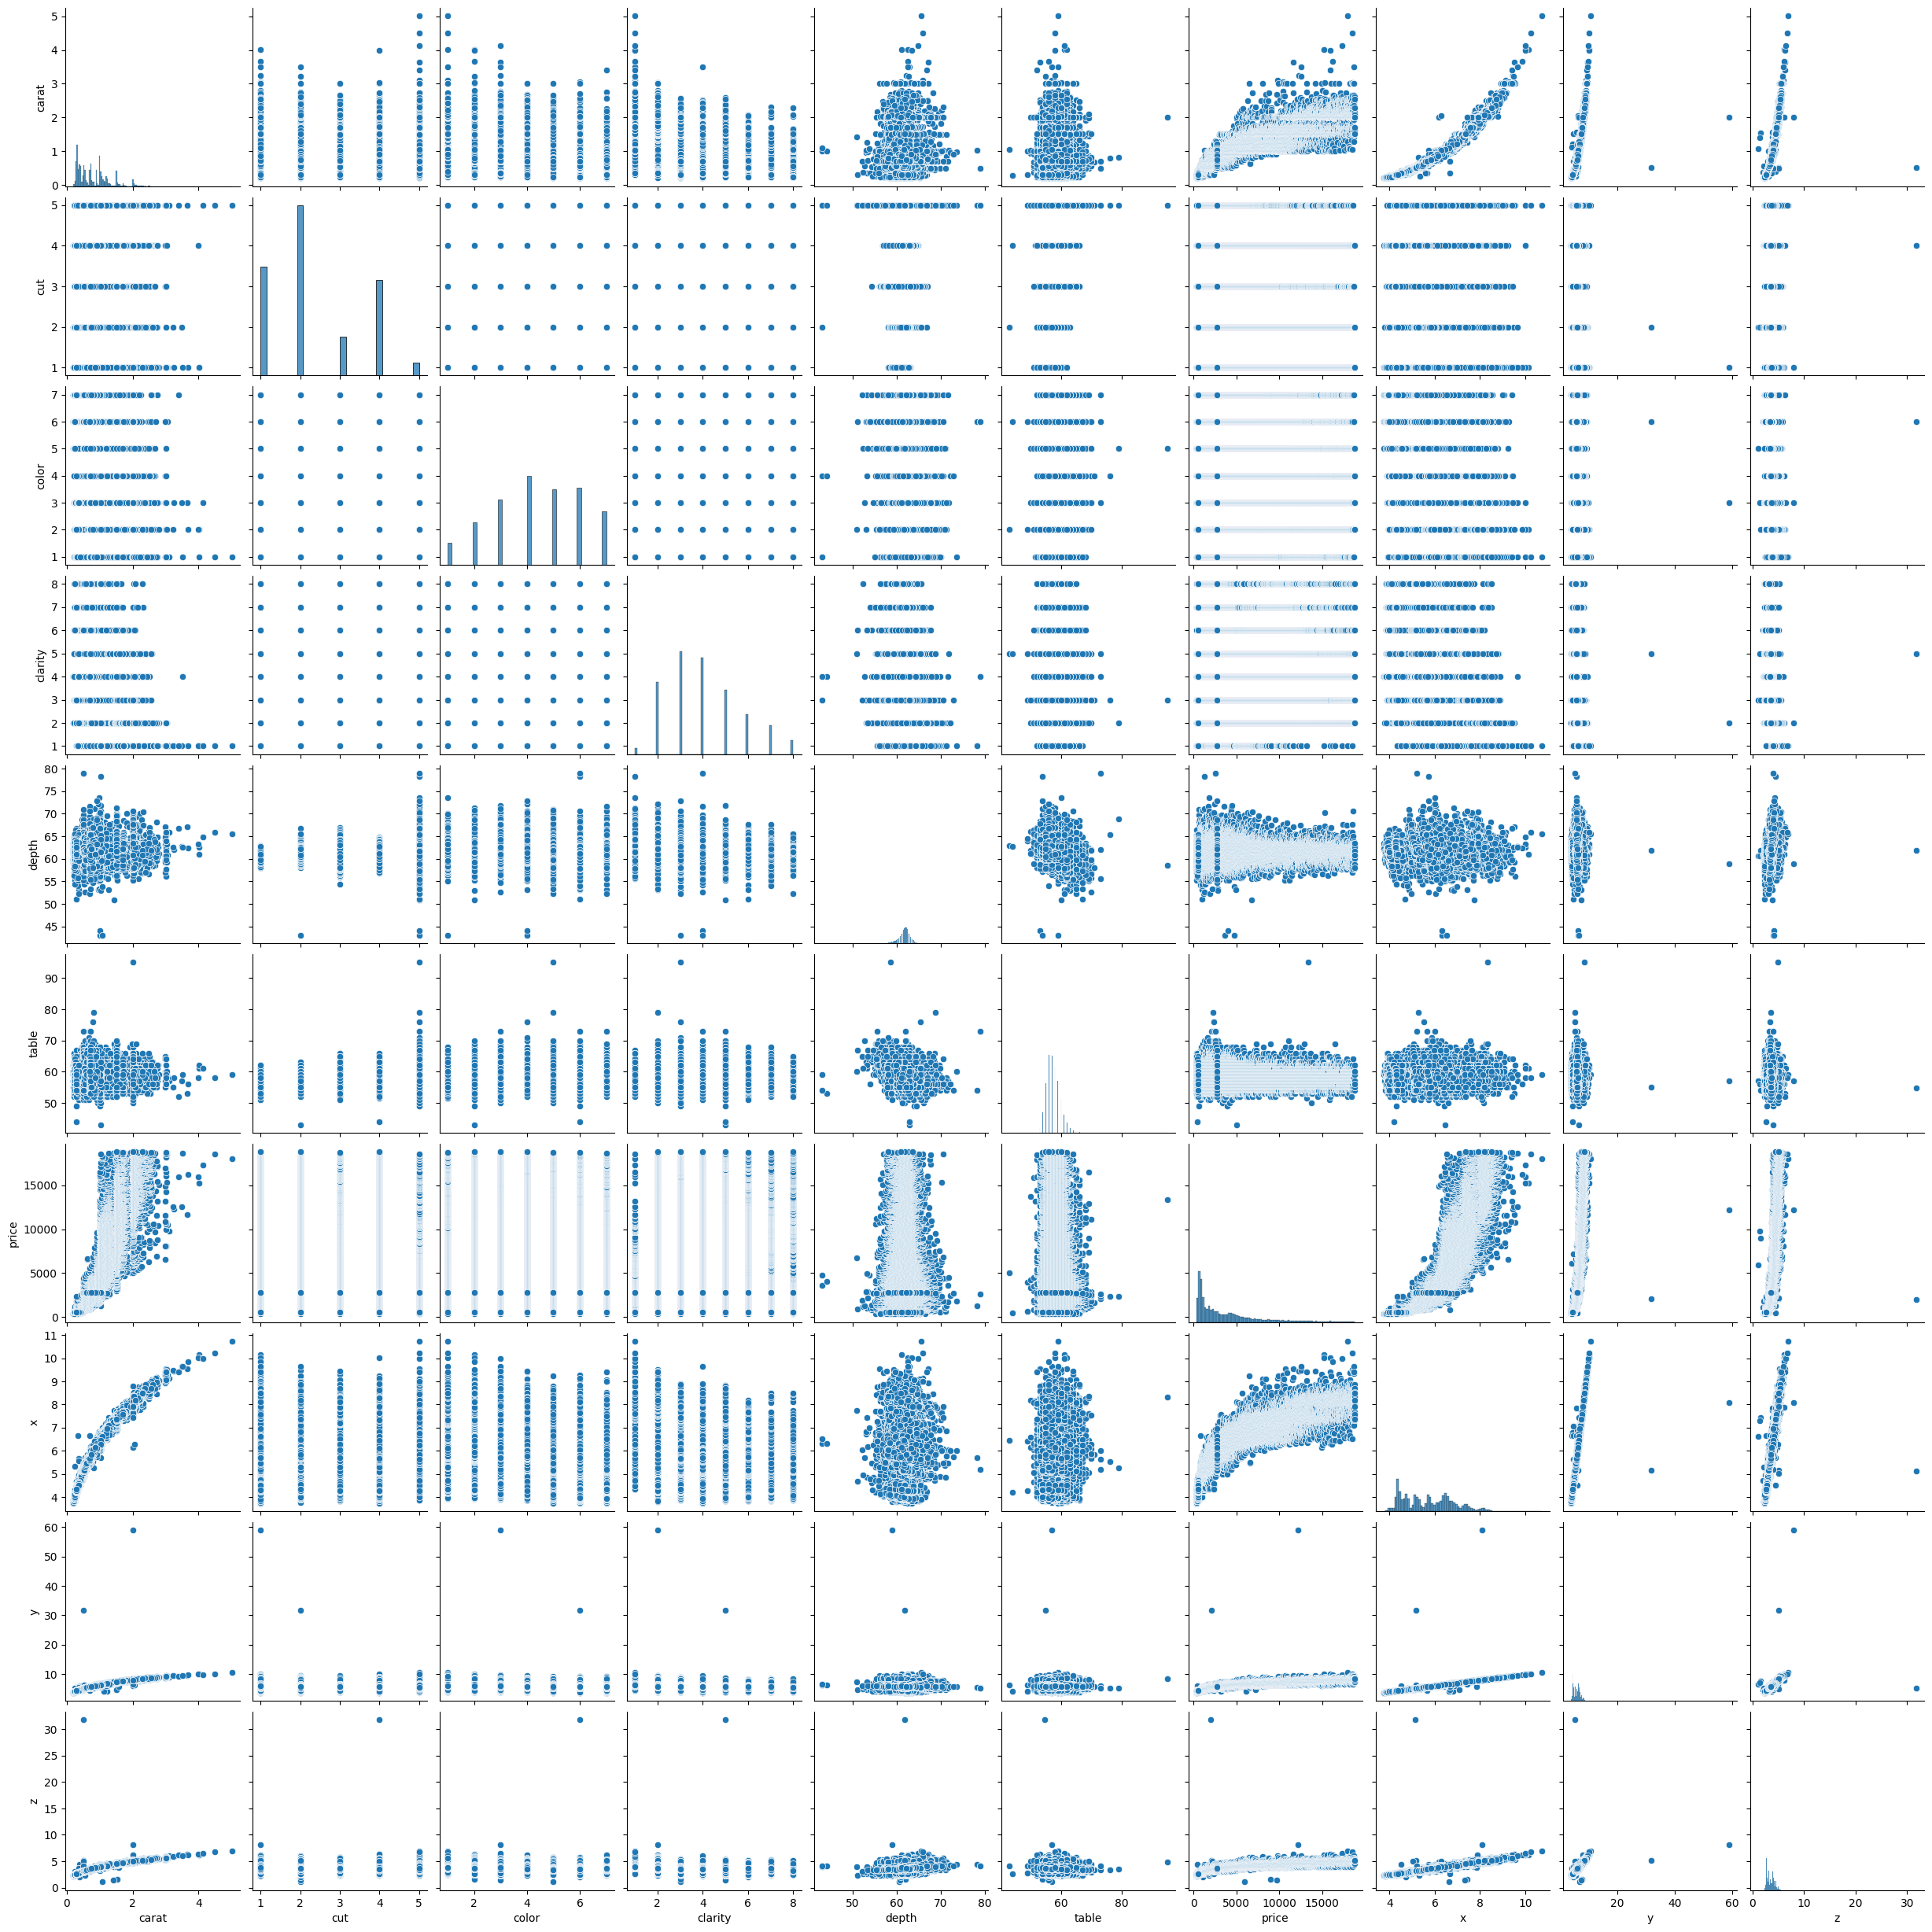

In [16]:
sns.pairplot(df1)
plt.show()

In [17]:
#There are some features with datapoint that are far from the rest of the dataset which will affect the outcome of our regression model.
#"y" and "z" have some dimensional outlies in our dataset that needs to be eliminated.
#The "depth" should be capped(to set the boundaries so that its value doesn't exeed) but we must examine the regression line to be sure.
#The "table" featured should be capped too.

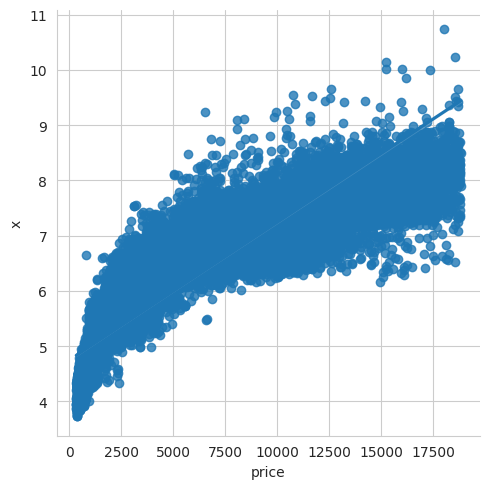

In [18]:
#Let's have a look at regression plots to get a close look at the outliers.
#lmplot()-linear model plot :- It creates a scatter plot with a linear fit on top of it.

sns.set_style('whitegrid')
sns.lmplot(x ='price', y ='x', data = df1)

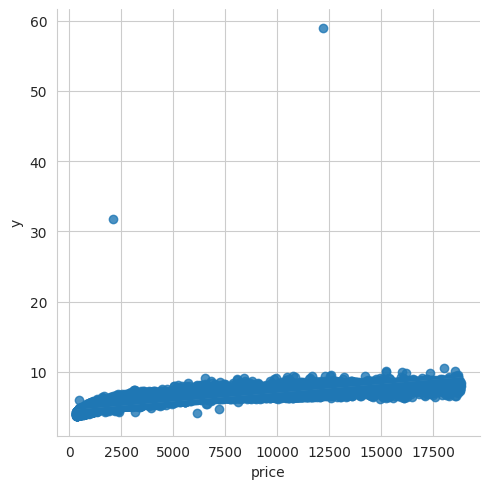

In [19]:
sns.set_style('whitegrid')
sns.lmplot(x ='price', y ='y', data = df1)

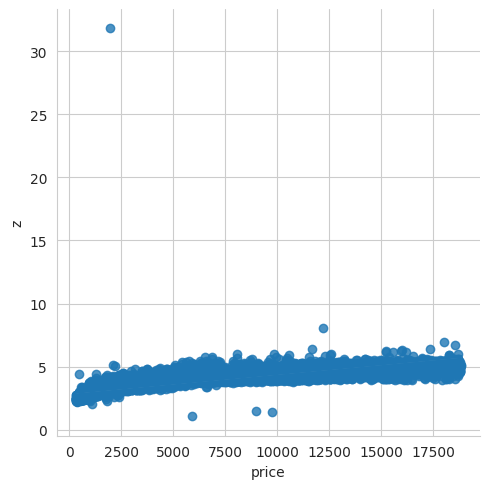

In [20]:
sns.set_style('whitegrid')
sns.lmplot(x ='price', y ='z', data = df1)

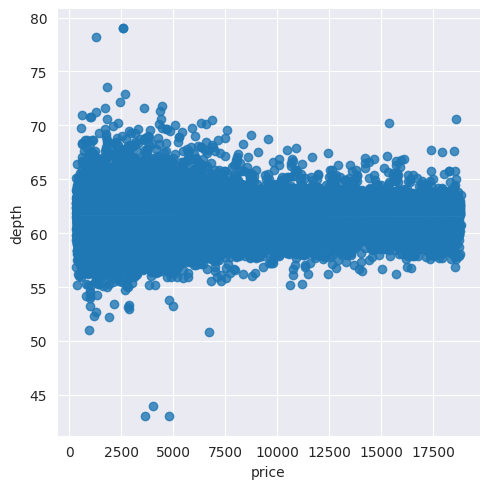

In [21]:
sns.set_style('darkgrid')
sns.lmplot(x ='price', y ='depth', data = df1)

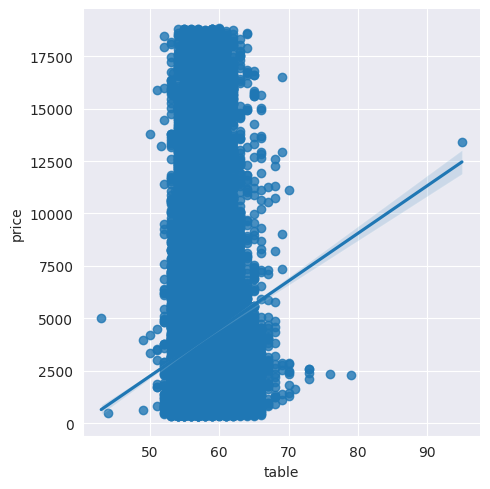

In [22]:
sns.set_style('darkgrid')
sns.lmplot(x ='table', y ='price', data = df1)

#### Dropping the outliers.

In [23]:
#Dropping the outliers.
df1 = df1[(df1["depth"]<75)&(df1["depth"]>45)]
df1 = df1[(df1["table"]<80)&(df1["table"]>40)]
df1 = df1[(df1["x"]<30)]
df1 = df1[(df1["y"]<30)]
df1 = df1[(df1["z"]<30)&(df1["z"]>2)]
df1.shape

(53907, 10)

## Visualising the Data

<Axes: >

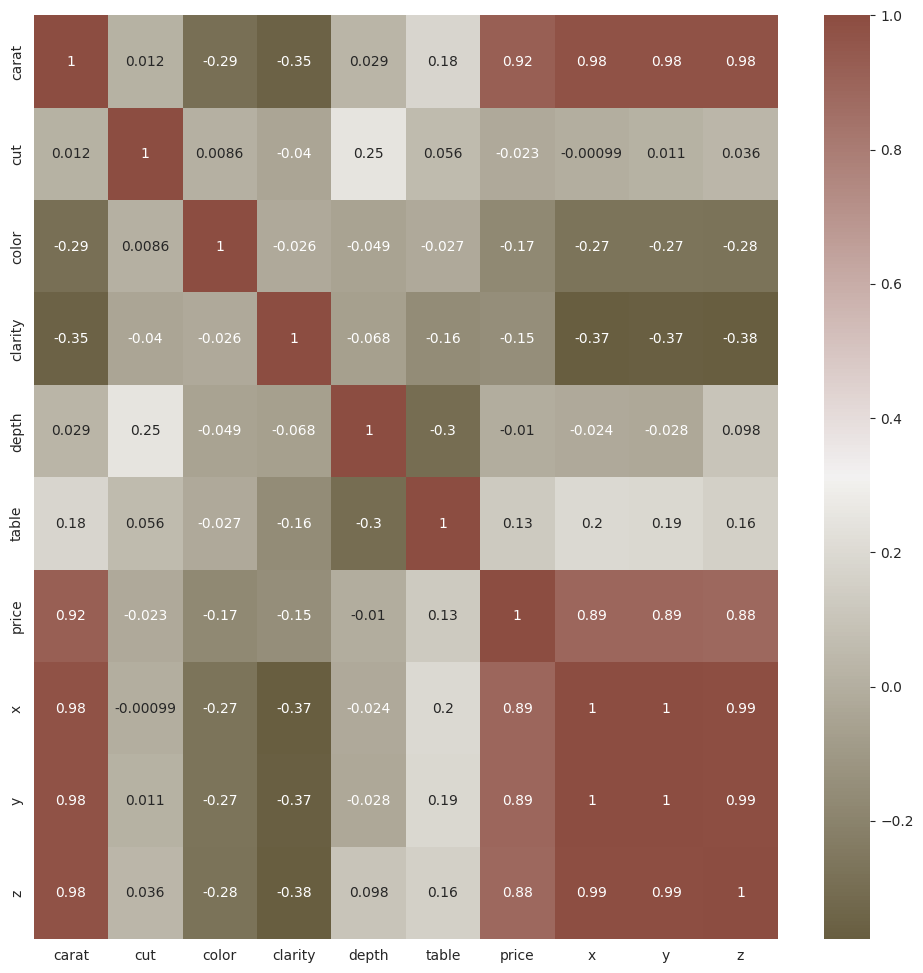

In [24]:
## correlation matrix using heatmap
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= df1.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True )

## Model Building

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [26]:
X= df1.drop(["price"],axis =1)
y= df1["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

In [27]:
# Building pipelins of standard scaler and model for varios regressors.

pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                     ("rf_classifier",XGBRegressor())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)


In [28]:
#Testing the Model with the best score on the test set
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -1215.300032 
DecisionTree: -757.413004 
RandomForest: -542.149605 
KNeighbors: -722.926615 
XGBRegressor: -544.704465 


In [29]:
##In the above scores, RandomForest appears to be the model with the best scoring on negative root mean square error
pred = pipeline_rf.predict(X_test)
pred

array([5997.15, 2698.56, 4439.99, ...,  908.01, 1179.37, 6921.02])

In [30]:
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.9809522818717922
Adjusted R^2: 0.980939552276251
MAE: 270.1964740448454
MSE: 298817.2546199712
RMSE: 546.6417973590852


In [32]:
##choosing RandomForestRegressor as our model
pred=pipeline_rf.predict([[00.70,	4,	7	,3,	62.8,	60.0	,	5.66	,5.68	,3.56]])
op_1=str(round(pred[0])) + ' la'
op_1

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


'2705 la'